In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.data.compute_zscores import compute_fundamental_zscores
from src.data.load_data import load_all_fundamentals

dfs = load_all_fundamentals()
df_z = compute_fundamental_zscores(dfs)
df_z.head(5)

,date,ticker,FCF_Yield,ROIC,Gearing,Revenue_Growth_YOY
11,2021-12-31,AIR.PA,0.135516,-0.068487,-0.508354,NaN
23,2022-12-31,AIR.PA,0.076872,0.475111,-0.555737,0.148230
35,2023-12-31,AIR.PA,0.067615,0.154229,-0.610542,0.068026
38,2024-03-31,AIR.PA,0.120362,0.061301,-0.538770,NaN
41,2024-06-30,AIR.PA,0.412547,-0.398473,-0.455341,NaN


ticker
AVAV        5
BA.L        5
CAE.TO      5
HEI         5
MTX.DE      5
RR.L        5
HO.PA       5
SAF.PA      5
TDG         5
ERJ         8
GD          8
BA          8
LDO.MI      8
HWM         8
BBD-B.TO    8
AIR.PA      8
NOC         8
LMT         8
RTX         8
SPR         8
TXT         8
Name: date, dtype: int64

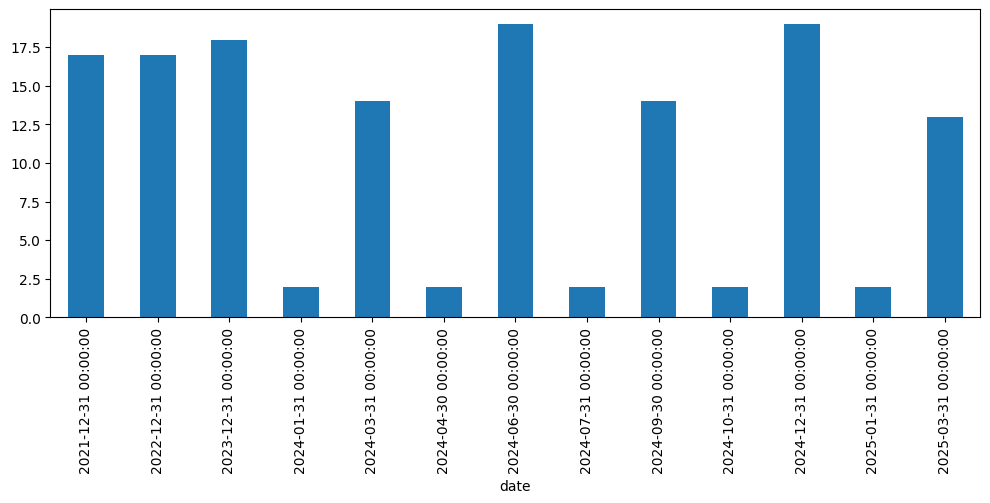

In [2]:
df_z.isna().mean().sort_values(ascending=False)
df_z.groupby("date")["ticker"].nunique().plot(kind="bar", figsize=(12,4))
df_z.groupby("ticker")["date"].count().sort_values()


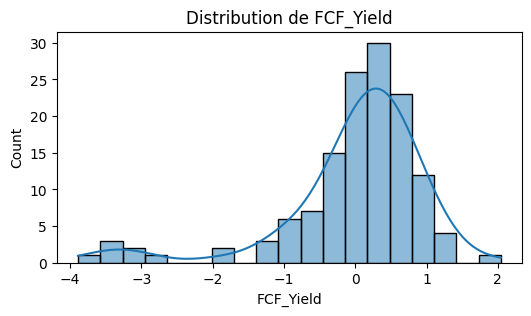

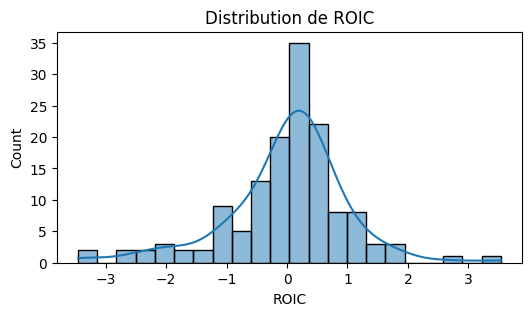

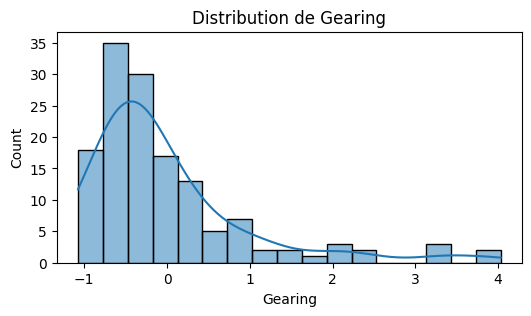

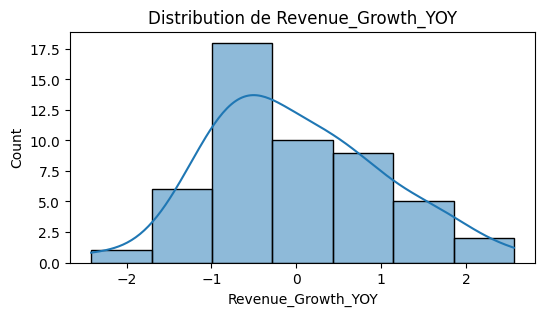

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

indicators = ["FCF_Yield", "ROIC", "Gearing", "Revenue_Growth_YOY"]
for col in indicators:
    plt.figure(figsize=(6, 3))
    sns.histplot(df_z[col], kde=True)
    plt.title(f"Distribution de {col}")
    plt.show()
